0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

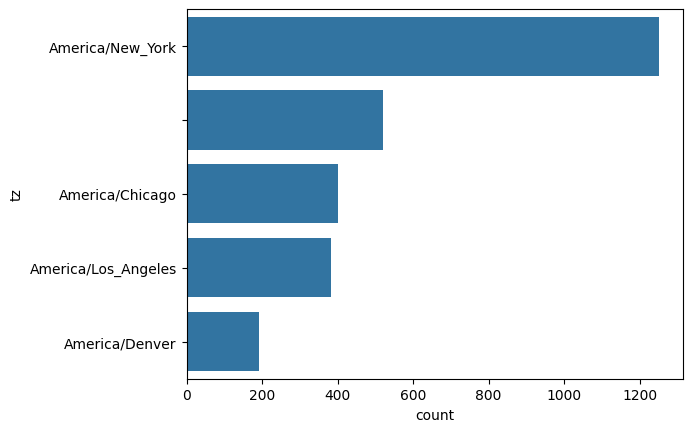

In [2]:
# 마지막 553p
import numpy as np
import pandas as pd
import json

path = 'example.txt'
with open(path, encoding='utf-8') as f:
    records = [json.loads(line) for line in f]

records[1]

#표준시간대 계산하기
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
'''
for문 한줄로
[표현식 for 항목 in 집합]


# 0부터 9까지 짝수만 모으기
test = [x for x in range(10) if x % 2 == 0]

# 0부터 9까지 짝수는 숫자로, 홀수는 '홀수'로
test2 = [x if x % 2 == 0 else '홀수' for x in range(10) ]
test2
'''
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

counts = get_counts(time_zones)
counts['America/New_York']
len(time_zones)

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

# top_counts(counts)
# ########################
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)


# pandas로 계산하기
frame = pd.DataFrame(records)
# frame.info()
# frame.head()
# frame.tail()
tz_counts = frame['tz'].value_counts()
tz_counts.head()

# seaborn
import seaborn as sns
subset = tz_counts.head() # 상위 5개 
sns.barplot(y=subset.index, x=subset)


# 사용자 정보 가져오기 560
# records[4]['a']
result = pd.Series([x.split()[0] for x in frame['a'].dropna()])
# result.head()

'''
windows 7 == 6.1
windows xp == 5.1
google map rochesterNY == 구글 맵

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (iPad; U; CPU OS 4_3_5 like Mac OS X; en-us) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8L1 Safari/6533.18.5
'''
# records[500]['a']
result

<Axes: xlabel='total', ylabel='tz'>

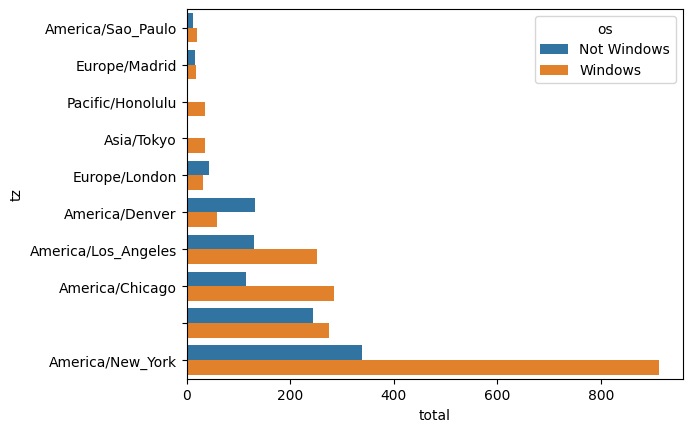

In [10]:
cframe = frame[frame['a'].notna()].copy()
cframe.tail()

# OS뽑기 -> windows or Not windows
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
# cframe['os'].tail()

# 2025-05-23
by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
indexer = agg_counts.sum('columns').argsort()
count_subset = agg_counts.take(indexer[-10:])

count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()

#seaborn 추가
import seaborn as sns
sns.barplot(x='total', y='tz', data=count_subset, hue='os')

C:\Users\hp\AppData\Local\Temp\ipykernel_16864\3492641627.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = count_subset.groupby('tz', group_keys=False).apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

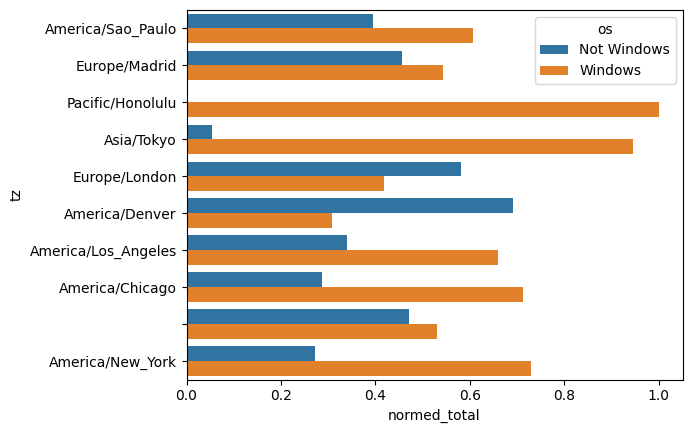

In [11]:
# 정규화 함수 만들기
def norm_total(group):
    group['normed_total'] = group['total'] / group['total'].sum()
    return group
result = count_subset.groupby('tz', group_keys=False).apply(norm_total)
#result
sns.barplot(x='normed_total', y='tz', data=result, hue='os')
#count_subset['total']